<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

<br><br>
## <strong>1 금융 시계열 데이터
1. 금융 데이터 수집하기
1. 테이블 결측치 처리하기
1. 정규화 처리하기

<br>
### **01 시계열 데이터 수집하기**
! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade
1. https://github.com/pydata/pandas-datareader


In [1]:
# %matplotlib inline

# from pandas_datareader import get_data_yahoo

# samsung = get_data_yahoo('005930.KS', '2017-01', '2018-01')
# samsung.Close.plot()

In [2]:
# samsung.head()

In [3]:
# samsung['2017-07'].head()

In [4]:
# from pandas_datareader import get_data_yahoo

# start_date = '2013-01-01' 
# #startdate를 1996년으로 설정해두면 가장 오래된 데이터부터 전부 가져올 수 있다.

# codes = ['GM', 'KO', '005930.KS', '031510.KQ']

# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)
# prices.head(3)

In [5]:
# prices.to_csv('./data/stock_data.csv', encoding='ms949')
# print('done')

In [6]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
000660.KS    1406 non-null float64
005930.KS    1406 non-null float64
GM           1406 non-null float64
KO           1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


In [7]:
prices.GM.resample('M').ohlc().tail()

,open,high,low,close
Date,,,,
2018-02-28,42.430000,42.430000,39.349998,39.349998
2018-03-31,37.790001,38.009998,34.869999,36.340000
2018-04-30,35.759998,39.220001,35.759998,36.740002
2018-05-31,36.419998,42.700001,36.150002,42.700001
2018-06-30,43.200001,43.779999,43.200001,43.779999


<br><br>
## **4 이동평균선을 활용한 매매 분석**
Golden Cross / Death Cross

## **Golden Cross 매매기법**
1. 단기 이평선이 장기 이평선을 상향 돌파하면 매수, 하향 돌파하면 매도하는 기법
1. 쉽게 만들수 있고 실제적으로도 많이 쓴다. (real??)
1. 다양한 변종을 만들수 있기 때문에 활용도가 크다

<br>
### **01 이동평균 데이터 생성하기**
이동평균 및 차분(.diff()) 데이터 생성하기

In [8]:
prices.tail(3)

,000660.KS,005930.KS,GM,KO
Date,,,,
2018-06-01,91400.0,51300.0,43.200001,43.119999
2018-06-04,89800.0,51100.0,43.779999,43.490002
2018-06-05,90800.0,50500.0,43.779999,43.490002


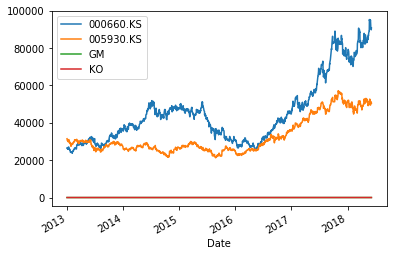

In [9]:
%matplotlib inline
prices.plot()

In [10]:
import pandas as pd
price_df = prices['005930.KS']     # Series 객체
price_df.head(3)

Date
2013-01-02    31520.0
2013-01-03    30860.0
2013-01-04    30500.0
Name: 005930.KS, dtype: float64

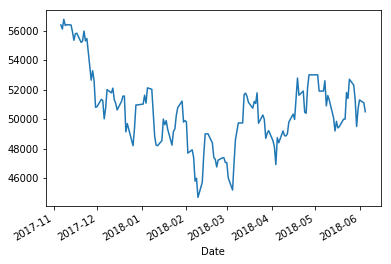

In [11]:
price_df[-150:].plot()

## **Series.rolling( ).mean()**
이동평균 데이터 생성하기 [정리 Blog](http://ordo.tistory.com/67)

In [12]:
import numpy as np
import pandas as pd
data = [ i  for i in range(1, 3000, 2)]
data = pd.Series(data)
data[:10]

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
8    17
9    19
dtype: int64

In [13]:
## 1 순차적으로 해당 범위의 값들로 이동평균을 계산한다
# 단점 : 이동평균을 계산하는 시초값을 NaN으로 처리된다
data.rolling(window=10).mean()[:10]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9    10.0
dtype: float64

In [14]:
## 1 순차적으로 해당 범위의 값들로 이동평균을 계산한다
# 단점 : 이동평균을 계산하는 시초값을 NaN으로 처리된다
data.rolling(window=10, center=True).mean()[:10]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5    10.0
6    12.0
7    14.0
8    16.0
9    18.0
dtype: float64

In [15]:
## 2 min_periods=3 
# 데이터가 최소 3개만 존재해도 평균을 계산한다
data.rolling(window=10, min_periods=3).mean()[:10]

0     NaN
1     NaN
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [16]:
## 2 min_periods=3 
# 데이터가 최소 3개만 존재해도 평균을 계산한다
data.rolling(window=10, min_periods=3, center=True).mean()[:10]

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6    12.0
7    14.0
8    16.0
9    18.0
dtype: float64

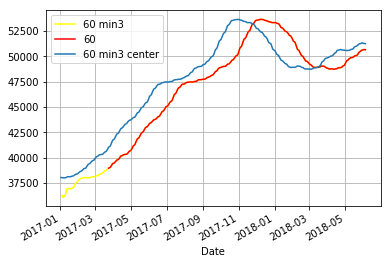

In [17]:
# min_periods 를 하면 뒷부분은 없을떄의 결과와 동일하다
%matplotlib inline
import matplotlib.pyplot as plt
price_df['2017':].rolling(60, min_periods=3).mean().plot(color='yellow', label='60 min3')
price_df['2017':].rolling(60).mean().plot(color='red', label='60')
price_df['2017':].rolling(60, center=True, min_periods=3).mean().plot(label='60 min3 center')
plt.legend()
plt.grid(True)

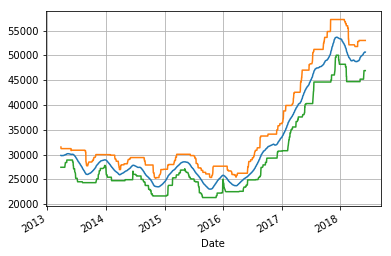

In [18]:
import matplotlib.pyplot as plt
price_df.rolling(60).mean().plot()
price_df.rolling(60).max().plot()
price_df.rolling(60).min().plot()
plt.grid(True)

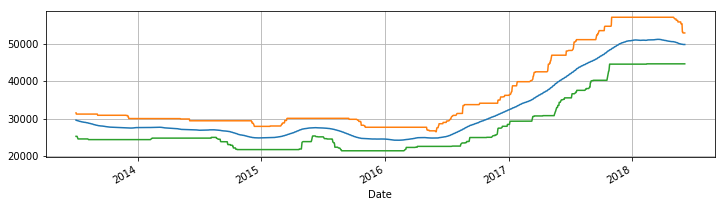

In [19]:
price_df.rolling(130).mean().plot(figsize=(12,3))
price_df.rolling(130).max().plot()
price_df.rolling(130).min().plot()
plt.grid(True)

In [20]:
# 조금이라도 더 빠른 처리를 하기 위해서 소숫점을 줄인다
np.round(price_df.rolling(30).mean(), 2).tail()

Date
2018-05-30    51385.00
2018-05-31    51315.67
2018-06-01    51305.00
2018-06-04    51278.33
2018-06-05    51279.67
Name: 005930.KS, dtype: float64

In [21]:
# .plot()
# 객체가 Series 일떄에만 중첩적인 작업이 가능하고
# DataFrame 인 경우에는 중첩적인 작업이 안되고 별개로 출력된다

In [22]:
# 15일 이동평균선과 14일 이동평균선
# 그리고 이동평균선간의 '차분'데이터 생성
import numpy as np
price_df = prices['005930.KS']     # Series 객체
price_df = pd.DataFrame(price_df)
# price_df.columns = 'Close'  

In [23]:
# 컬럼명이 1개여도 꼭 [list] 객체를 사용해야 한다
price_df.columns = ['Close']  
price_df.head(3)

,Close
Date,
2013-01-02,31520.0
2013-01-03,30860.0
2013-01-04,30500.0


,Close,15d,40d,15d-40d
Date,,,,
2018-06-01,51300.0,50603.33,51024.25,-420.92
2018-06-04,51100.0,50670.00,51071.75,-401.75
2018-06-05,50500.0,50756.67,51112.25,-355.58


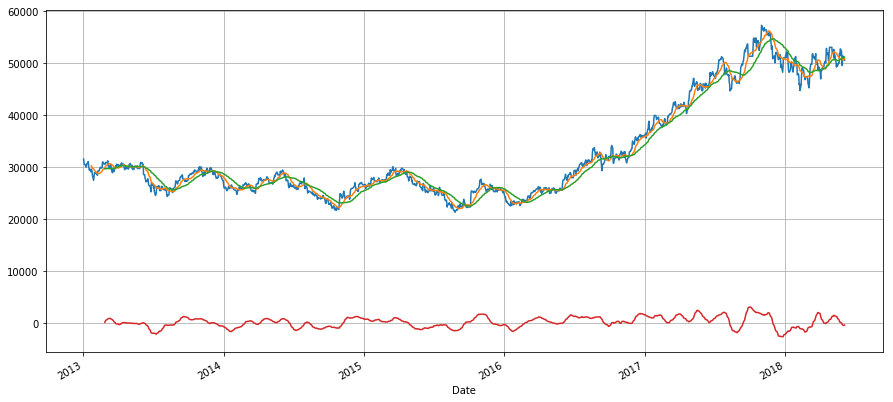

In [24]:
price_df['15d'] = np.round(price_df['Close'].rolling(window=15).mean(),  2)
price_df['40d'] = np.round(price_df['Close'].rolling(window=40).mean(),  2)
price_df['15d-40d'] = price_df['15d'] - price_df['40d']
price_df['Close'].plot(grid = True, figsize = (15, 7))
price_df['15d'].plot(grid = True, figsize = (15, 7))
price_df['40d'].plot(grid = True, figsize = (15, 7))
price_df['15d-40d'].plot(grid = True, figsize = (15, 7))
price_df.tail(3)

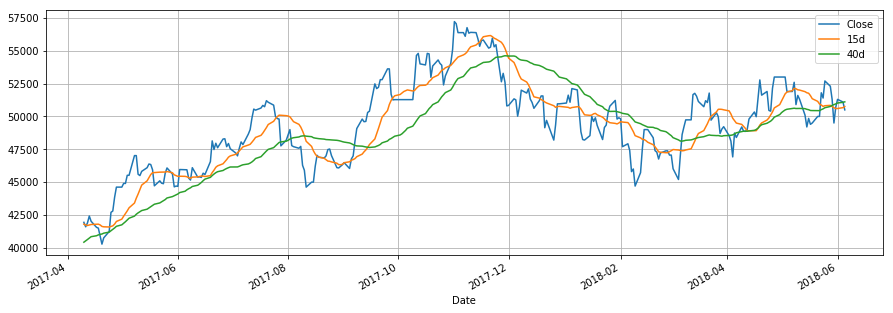

In [25]:
price_df[['Close','15d','40d']].iloc[-300:, :].plot(figsize=(15,5))
plt.grid()

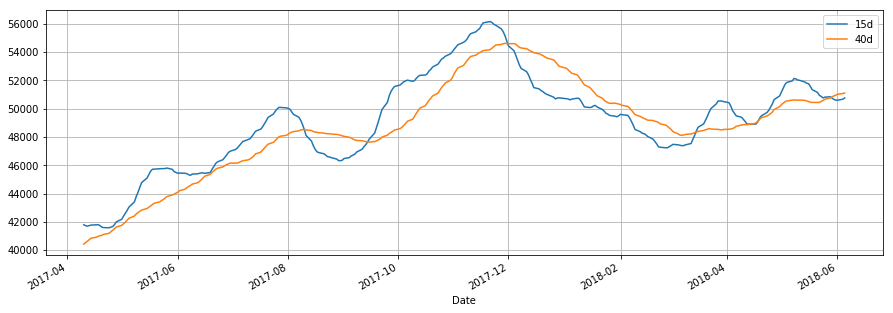

In [26]:
price_df[['15d','40d']].iloc[-300:, :].plot(figsize=(15,5))
plt.grid()

<br>
### **02 매매 시점 데이터 생성하기**
이동평균 및 차분(.diff()) 데이터 생성하기
1. np.where(조건문, True일때 입력데이터, False 일때 입력할 데이터)

np.where
## **numpy.where()**
np.where('condition', 'x', 'y')

In [27]:
num_test = [ i  for i in range(100)]

In [28]:
num_test = pd.Series(num_test)

In [29]:
import pandas as pd
import numpy as np

In [30]:
np.where(num_test%20==0, num_test, False)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 60,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [31]:
# 조건문으로 판단한 결과 (Boolean) 조건문이 True 일때 대체할 내용, False 일때 대체할 내용

## **np.where() 를 사용하여 신호별 데이터를 생성한다**
1. 이동평균 교점에 따른 시간에 따른 신호데이터 생성
2. 매매구간 신호의 임계값을 10으로 가정

####  1 : 주식 매매기간 
#### -1 : 공매도 매매기간

In [32]:
X = 10     
price_df['Stance'] = np.where(price_df['15d-40d']>X,  1, 0)                   # True :  1 \ False : 0
price_df['Stance'] = np.where(price_df['15d-40d']<X, -1, price_df['Stance'])  # True : -1 \ False : Original Data
price_df['Stance'].value_counts()                             

 1    808
-1    559
 0     39
Name: Stance, dtype: int64

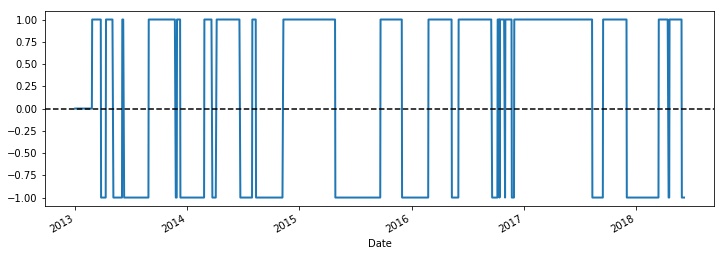

In [33]:
price_df['Stance'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

<br>
### **03 SMAC_Strategy (이동평균선 전략)으로 인한 수익률  데이터 생성**
1. 데이터 변화를 Pct_change 가 아닌 Log 로 변환
1. .cumsum() : Log 결과값을 더하면 누적 수익률로 예측이 가능
1. np.exp() : $ y = e^x$ 자연상수 지수함수로 변환 &nbsp;&nbsp; | &nbsp; [출처](http://rfriend.tistory.com/295)

## .shift()
객체를 이동해서 계산한다

In [34]:
list_data = [i   for i in range(150)]

In [35]:
list_data = pd.Series(list_data)

In [36]:
list_chg = list_data / list_data.shift(1)

In [37]:
list_chg[:10]

0         NaN
1         inf
2    2.000000
3    1.500000
4    1.333333
5    1.250000
6    1.200000
7    1.166667
8    1.142857
9    1.125000
dtype: float64

## np.log()
1. 주가 데이터를 log 수익률 데이터로 변환
1. 이유는?? 계산이 쉽다
1. 이율 복리공식 : (이율 * (1 + 직전이율) 계속곱해줘야...
1. 로그 복리공식 : 로그 수익률 + 로그 수익률.... (덧셈공식이 적용 가능하다)

<img src="https://www.rapidtables.com/math/algebra/logarithm/log-graph.png" align="left">

In [38]:
np.log(list_chg)[:10]

0         NaN
1         inf
2    0.693147
3    0.405465
4    0.287682
5    0.223144
6    0.182322
7    0.154151
8    0.133531
9    0.117783
dtype: float64

In [39]:
# 현재까지 작업한 데이터
price_df.tail(3)

,Close,15d,40d,15d-40d,Stance
Date,,,,,
2018-06-01,51300.0,50603.33,51024.25,-420.92,-1
2018-06-04,51100.0,50670.00,51071.75,-401.75,-1
2018-06-05,50500.0,50756.67,51112.25,-355.58,-1


In [40]:
# 종가 데이터 log 수익률 계산
price_df['Stock_Returns'] = np.log(price_df['Close'] / price_df['Close'].shift(1))
price_df['Stock_Returns'][:10]

Date
2013-01-02         NaN
2013-01-03   -0.021161
2013-01-04   -0.011734
2013-01-07   -0.003284
2013-01-08   -0.013245
2013-01-09    0.000000
2013-01-10    0.019803
2013-01-11    0.001959
2013-01-14    0.012318
2013-01-15   -0.026111
Name: Stock_Returns, dtype: float64

In [41]:
# SMAC 시그널을 log 수익률과 곱한다
price_df['SMAC_Strategy'] = price_df['Stock_Returns'] * price_df['Stance'].shift(1)  

## np.exp()
$ y = e^x$   
cf) e 는 **자연상수** 값으로 Log 값을 지수함수로 원본 변화율로 데이터로 변환 &nbsp;&nbsp; | &nbsp; [출처](http://rfriend.tistory.com/295)

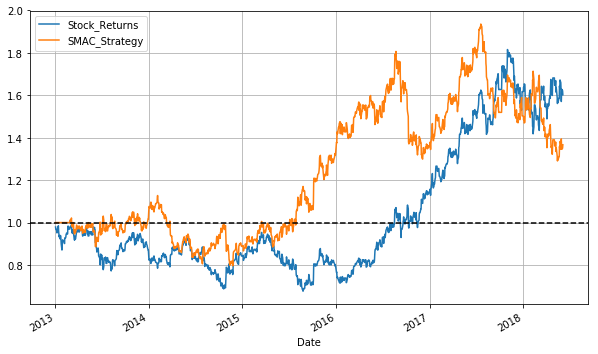

In [42]:
# log 수익률과
# 시그널을 계산한 log 수익률을 대상으로
# 시간변화에 따른 누적이율을 계산한다
price_df[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **04 SMAC_Strategy (이동평균선 전략)으로 인한 수익률  데이터 생성**
공매도가 불가능한 경우 수익률 계산

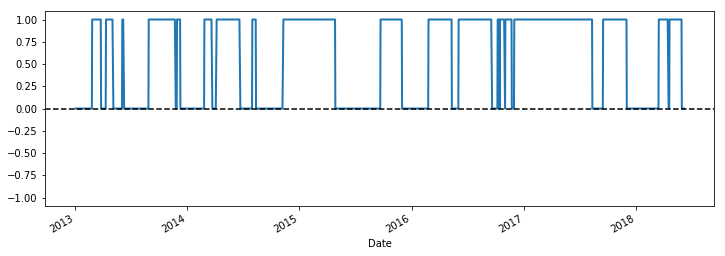

In [43]:
price_df['Stance2'] = np.where(price_df['15d-40d']>X,  1, 0)                # True :  1 \ False : 0
price_df['Stance2'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

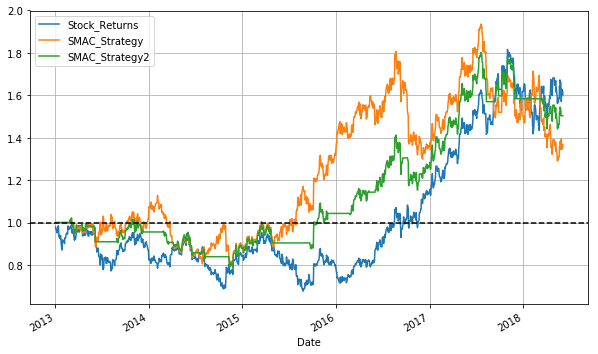

In [44]:
# 일간 log() 변환데이터 생성
# 매매 데이터를 1일 지연시키고, 시장 수익률을 곱한다
price_df['Stock_Returns']  = np.log(price_df['Close']  / price_df['Close'].shift(1))    
price_df['SMAC_Strategy2'] = price_df['Stock_Returns'] * price_df['Stance2'].shift(1)   
price_df[['Stock_Returns','SMAC_Strategy','SMAC_Strategy2']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
올린 자료에는 없고 추가적으로 기록한 내용
### **05 SMAC_Strategy (이동평균선 전략) 수익률 계산**
전략의 구간별 수익률 결과값 계산

In [45]:
price_df['2014'].SMAC_Strategy.sum()

-0.13544376228689597

In [46]:
price_df['2015'].SMAC_Strategy2.sum()

0.17195039433251325

In [47]:
price_df['2016-12'].SMAC_Strategy2.sum()

0.03156970176873539

[참고 사이트] https://m.blog.naver.com/PostView.nhn?blogId=ntkor&logNo=102942082
1. 추세장에서는 비교적 정확한 동작을 하지만, 횡보장이나 변동장에서는 잘못된 매매신호로 인한 손실이 발생할 가능성이 크다.
1. 즉 기본 이평선의 특징을 이용하되 잘못된 매매신호가 발생하는 것을 최소화 하여 수익을 내고자 한다.
1. 먼저 단기 이평선이 장기 이평선을 상향 돌파 하는 순간을 ‘가능한 매수 시점’으로 잡고, 이 신호의 적합성을 검사한다. 
1. 돌파가 발생한 시점을 기준으로 최근 12개 캔들(Candel-OHLC)의 고점보다 3% 높은 가격으로 매수 주문을 내고, 
1. 이후 12개 캔들 안에 해당 주문이 채결되지 않으면 주문을 취소한다.
1. 하락추세는 반대 방법을 사용하여 Short 거래 시점을 잡는다 (대차거래, 공매도) <small>우리는 안될꺼야 아마도..</small>